In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from keras.callbacks import EarlyStopping,ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization , Flatten
from keras.models import Model
from keras.layers.convolutional import Conv2D , MaxPooling2D 
from keras.layers import BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc ,classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers , layers
import tensorflow as tf
from tensorflow import keras
import time
import cv2
import os
import PIL
from glob import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
tf.__version__

'2.6.0'

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


**PART 1**

In [3]:
trainData = []

# Load data to file
trainData = np.load("/content/drive/MyDrive/AIML/LABS/CV/Project2/Part 1- Train data - images.npy", allow_pickle=True)

print("Shape of Train set",trainData.shape)
print("Type of trainData",trainData.dtype)

Shape of Train set (409, 2)
Type of trainData object


In [ ]:
trainData[:1]

array([[array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
        list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615

In [ ]:
data = pd.DataFrame(trainData)
data.columns = ['Images','Mask']
trainImg = data['Images']
trainImg.head()

0    [[[42, 37, 34], [56, 51, 48], [71, 66, 63], [7...
1    [[[207, 216, 227, 255], [206, 216, 227, 255], ...
2    [[[91, 61, 33], [95, 65, 37], [94, 64, 38], [9...
3    [[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...
4    [[[250, 250, 250], [250, 250, 250], [250, 250,...
Name: Images, dtype: object

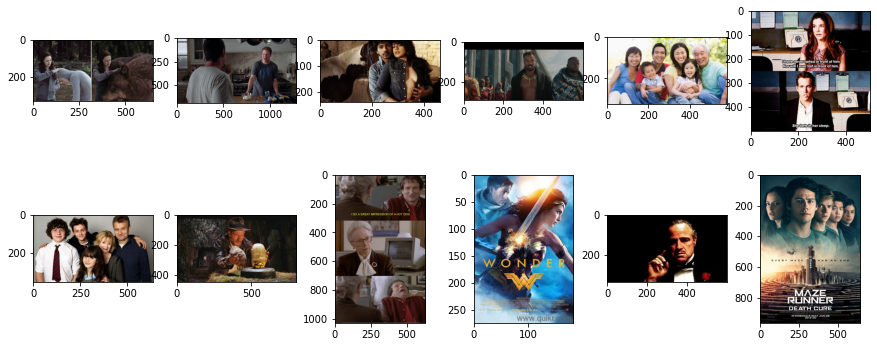

In [ ]:
# example images
plt.figure(figsize=(15,6)) 
for i in range(12):
    plt.subplot(2, 6, i + 1) 
    plt.imshow(trainImg[i])

In [ ]:
mask = data["Mask"]
mask.head(5)

0    [{'label': ['Face'], 'notes': '', 'points': [{...
1    [{'label': ['Face'], 'notes': '', 'points': [{...
2    [{'label': ['Face'], 'notes': '', 'points': [{...
3    [{'label': ['Face'], 'notes': '', 'points': [{...
4    [{'label': ['Face'], 'notes': '', 'points': [{...
Name: Mask, dtype: object

In [ ]:
mask[0]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

In [ ]:
mask[4]

[{'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465},
   {'x': 0.6603448275862069, 'y': 0.3773006134969325}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792},
   {'x': 0.4896551724137931, 'y': 0.4049079754601227}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154},
   {'x': 0.2775862068965517, 'y': 0.44171779141104295}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465},
   {'x': 0.8448275862068966, 'y': 0.41411042944785276}]},
 {'imageHeight': 326,
  'imageWidth': 580,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295},
   {'x': 0.4189655172413793, 'y': 0.65337423

Image 0 have only two faces in image....so mask for 2 images is given
where as image4 is having 6 faces in image..mask for 6 images is given

In [ ]:
len(mask)

409

In [ ]:
maxFaces = 0
for i in range(len(mask)): 
  if maxFaces < len(mask[i]):
    maxFaces = len(mask[i])

print("Max Faces in a image is " , maxFaces)

Max Faces in a image is  16


In [4]:
#Image Settings -

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

masks = np.zeros((int(trainData.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
originals = np.zeros((int(trainData.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for idx in range(trainData.shape[0]):
    img = trainData[idx][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    originals[idx] = np.array(img, dtype=np.float32)
    originals[idx] /= 255
    for i in trainData[idx][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[idx][y1:y2, x1:x2] = 1

In [ ]:
print("originals Set Shape is" ,originals.shape )
print("masks set shape is    " ,masks.shape)

originals Set Shape is (409, 128, 128, 3)
masks set shape is     (409, 128, 128)


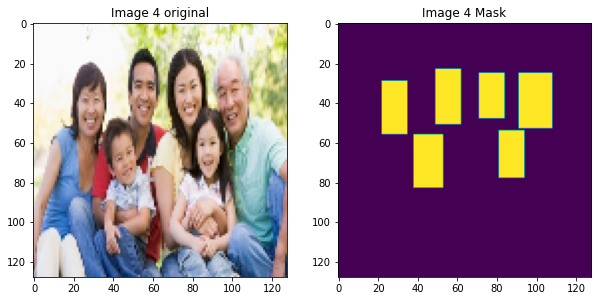

In [ ]:
#lets see the orginal images and Mask images

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(originals[4])
ax[0].set_title("Image 4 original")

ax[1].imshow(masks[4])
ax[1].set_title("Image 4 Mask")

plt.show()

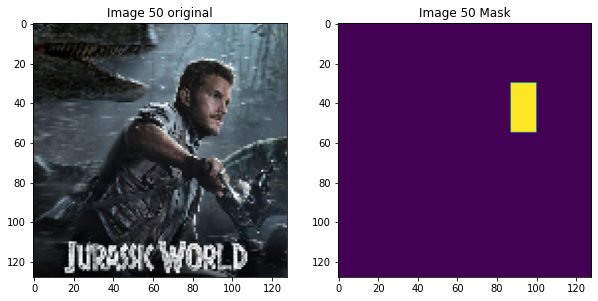

In [ ]:
#lets see the orginal images and Mask images

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(originals[50])
ax[0].set_title("Image 50 original")

ax[1].imshow(masks[50])
ax[1].set_title("Image 50 Mask")

plt.show()

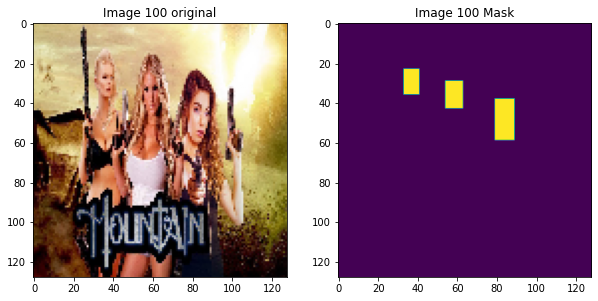

In [ ]:
#lets see the orginal images and Mask images

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(originals[100])
ax[0].set_title("Image 100 original")

ax[1].imshow(masks[100])
ax[1].set_title("Image 100 Mask")

plt.show()

In [5]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-zfhmapru
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-zfhmapru
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 2.5 MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33810 sha256=497c84e236a500dc5d7f0476f8a0f601bc154e483bd6df085e76cb894f789dea
  Stored in directory: /tmp/pip-ephem-wheel-cache-658_n2jy/wheels/02/cd/18/61c0bbb8766acfec68f9d20618886b7b38dfeeb95865b6ba00
Successfully built segmentation-models


In [6]:
from sklearn.model_selection import train_test_split
# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(originals, masks, test_size=0.15, random_state=142)

In [7]:
#Checking shapes after one-hot encoding
print("X_train shape is", X_train.shape) 
print("y_train shape is", y_train.shape) 
print("X_test shape is", X_valid.shape) 
print("y_test shape is", y_valid.shape)

X_train shape is (347, 128, 128, 3)
y_train shape is (347, 128, 128)
X_test shape is (62, 128, 128, 3)
y_test shape is (62, 128, 128)


**Loss and Dice coefficeint Function**

In [8]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    return tf.keras.backend.binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [9]:
from segmentation_models import Unet

model = Unet(backbone_name='resnet34', encoder_weights=None, input_shape=(128, 128, 3))

model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

model.summary()

Segmentation Models: using `keras` framework.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 128, 128, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
______________________________________________

In [10]:
from keras.callbacks import EarlyStopping,ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

batch_size=3
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
earlystop = EarlyStopping(patience=10)
modelsave = ModelCheckpoint(
    filepath='best_model.h5', save_best_only=True, verbose=1,mode='auto')

model.fit(X_train, y_train, 
                    epochs=150,
                    validation_data=(X_valid, y_valid),
                    verbose=1,use_multiprocessing=True,
                    callbacks=[annealer, earlystop,modelsave])

Epoch 1/150
11/11 [==============================] - 48s 887ms/step - loss: 1.6662 - dice_coefficient: 0.3096 - val_loss: 13.2925 - val_dice_coefficient: 5.5630e-04

Epoch 00001: val_loss improved from inf to 13.29255, saving model to best_model.h5
Epoch 2/150
11/11 [==============================] - 4s 330ms/step - loss: 1.2730 - dice_coefficient: 0.4067 - val_loss: 18.0434 - val_dice_coefficient: 0.0000e+00

Epoch 00002: val_loss did not improve from 13.29255
Epoch 3/150
11/11 [==============================] - 4s 330ms/step - loss: 1.1048 - dice_coefficient: 0.4582 - val_loss: 6.5631 - val_dice_coefficient: 0.0143

Epoch 00003: val_loss improved from 13.29255 to 6.56315, saving model to best_model.h5
Epoch 4/150
11/11 [==============================] - 4s 331ms/step - loss: 0.9773 - dice_coefficient: 0.5028 - val_loss: 4.5437 - val_dice_coefficient: 0.0830

Epoch 00004: val_loss improved from 6.56315 to 4.54365, saving model to best_model.h5
Epoch 5/150
11/11 [======================

In [ ]:
os.chdir('/content/drive/MyDrive/AIML/LABS/CV/Project2')

In [ ]:
model.save('./best_model_UNET.h5')
model.save_weights('./best_model_UNET_weights.h5')

In [11]:
model.evaluate(X_valid,y_valid)

2/2 [==============================] - 0s 124ms/step - loss: 1.2089 - dice_coefficient: 0.4753


[1.20887291431427, 0.4753192961215973]

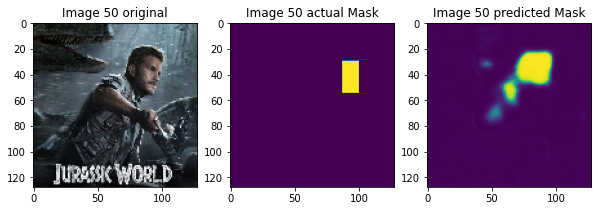

In [ ]:
#lets see the orginal images and Mask images and predicted mask

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(originals[50])
ax[0].set_title("Image 50 original")

ax[1].imshow(masks[50])
ax[1].set_title("Image 50 actual Mask")

pred = model.predict(originals[50].reshape(1,128,128,3))
ax[2].imshow(pred.reshape(128,128))
ax[2].set_title("Image 50 predicted Mask")
plt.show()

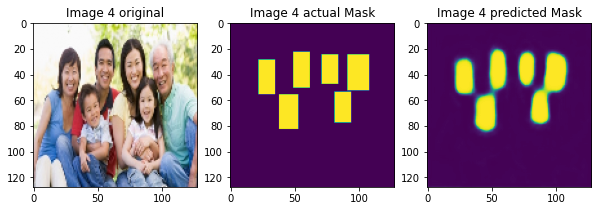

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(originals[4])
ax[0].set_title("Image 4 original")

ax[1].imshow(masks[4])
ax[1].set_title("Image 4 actual Mask")

pred = model.predict(originals[4].reshape(1,128,128,3))
ax[2].imshow(pred.reshape(128,128))
ax[2].set_title("Image 4 predicted Mask")
plt.show()

In [12]:
from segmentation_models import Unet

model1 = Unet(backbone_name='inceptionv3', encoder_weights=None, input_shape=(128, 128, 3))

model1.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 64, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 64, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

Model with Inception

In [13]:
from keras.callbacks import EarlyStopping,ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

batch_size=3
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
earlystop = EarlyStopping(patience=10)
modelsave = ModelCheckpoint(
    filepath='./best_model1.h5', save_best_only=True, verbose=1,mode='auto')

model1.fit(X_train, y_train, 
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    verbose=1,use_multiprocessing=True,
                    callbacks=[annealer, earlystop,modelsave])

Epoch 1/100
11/11 [==============================] - 24s 1s/step - loss: 1.8827 - dice_coefficient: 0.2715 - val_loss: 2.1850 - val_dice_coefficient: 0.2054

Epoch 00001: val_loss improved from inf to 2.18497, saving model to ./best_model1.h5
Epoch 2/100
11/11 [==============================] - 5s 469ms/step - loss: 1.4088 - dice_coefficient: 0.3733 - val_loss: 2.0485 - val_dice_coefficient: 0.2087

Epoch 00002: val_loss improved from 2.18497 to 2.04853, saving model to ./best_model1.h5
Epoch 3/100
11/11 [==============================] - 5s 470ms/step - loss: 1.1585 - dice_coefficient: 0.4353 - val_loss: 2.0879 - val_dice_coefficient: 0.1874

Epoch 00003: val_loss did not improve from 2.04853
Epoch 4/100
11/11 [==============================] - 5s 473ms/step - loss: 0.9979 - dice_coefficient: 0.4903 - val_loss: 1.8405 - val_dice_coefficient: 0.2386

Epoch 00004: val_loss improved from 2.04853 to 1.84052, saving model to ./best_model1.h5
Epoch 5/100
11/11 [=============================

In [14]:
model1.evaluate(X_valid,y_valid)

2/2 [==============================] - 0s 180ms/step - loss: 4.2011 - dice_coefficient: 0.0260


[4.201127529144287, 0.026011068373918533]

**Resnet34 performed best comapring to InceptionV3.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generator with data augmentation 
datagen     = ImageDataGenerator(
                                rotation_range=180,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               brightness_range=None,
                               shear_range=0.0,
                               zoom_range=0.1,
                               channel_shift_range=0.0,
                               fill_mode='nearest',
                               horizontal_flip=True,
                               vertical_flip=True)

datagen.fit(X_train)

In [ ]:
!pwd

/content/drive/My Drive/AIML/LABS/CV/Project2


Lets try augmentation with Resnet34

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

batch_size=3
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
earlystop = EarlyStopping(patience=10)
modelsave = ModelCheckpoint(
    filepath='./best_model_aug.h5', save_best_only=True, verbose=1,mode='auto')

model.fit_generator(datagen.flow(X_train, y_train), 
                    epochs=200,
                    validation_data=(X_valid, y_valid),
                    verbose=1,
                    callbacks=[annealer, modelsave,earlystop])

Epoch 1/200
11/11 [==============================] - 4s 355ms/step - loss: 1.3029 - dice_coefficient: 0.4004 - val_loss: 1.6940 - val_dice_coefficient: 0.3769

Epoch 00001: val_loss improved from inf to 1.69396, saving model to ./best_model_aug.h5
Epoch 2/200
11/11 [==============================] - 4s 354ms/step - loss: 1.2666 - dice_coefficient: 0.4074 - val_loss: 2.1821 - val_dice_coefficient: 0.3584

Epoch 00002: val_loss did not improve from 1.69396
Epoch 3/200
11/11 [==============================] - 4s 351ms/step - loss: 1.2670 - dice_coefficient: 0.4112 - val_loss: 1.9760 - val_dice_coefficient: 0.3986

Epoch 00003: val_loss did not improve from 1.69396
Epoch 4/200
11/11 [==============================] - 4s 354ms/step - loss: 1.2331 - dice_coefficient: 0.4203 - val_loss: 2.4254 - val_dice_coefficient: 0.3523

Epoch 00004: val_loss did not improve from 1.69396
Epoch 5/200
11/11 [==============================] - 4s 349ms/step - loss: 1.2385 - dice_coefficient: 0.4205 - val_loss

AUgmentation didnt added any improvement further.

We got very less loss with Resnet34 model

***TEST Image Prediction***

In [ ]:
!pwd

/content/drive/My Drive/AIML/LABS/CV/Project2


In [ ]:
!ls

 best_model1.h5       best_model_UNET_weights.h5
 best_model_aug.h5   'Part 1- Train data - images.npy'
 best_model_UNET.h5


In [ ]:
def classify(img_path,model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)

    img_ex = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_ex.astype('float32') / 255
  
    prediction = model.predict(img_preprocessed.reshape(1,128,128,3))
    
    print("Predicted Mask Test image is ")
    plt.imshow(prediction.reshape(128,128))

Predicted Mask Test image is 


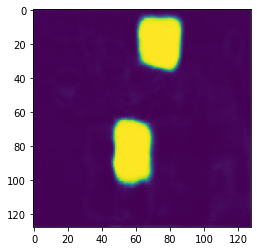

In [ ]:
img_path = "/content/drive/MyDrive/AIML/LABS/CV/Project2/Part 1Test Data - Prediction Image.jpeg"

model = keras.models.load_model('./best_model_UNET.h5', compile=False)

classify(img_path,model)

**PART 2**

In [3]:
os.chdir("/content/drive/MyDrive/AIML/LABS/CV/Project2/Part2/")

In [ ]:
#Extract the zip file in current directory
!unzip -u "Part 3 - Aligned Face Dataset from Pinterest.zip"

In [4]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')

In [5]:
print("MetaDATA Shape is " , metadata.shape)

MetaDATA Shape is  (10770,)


In [ ]:
metadata[0:10]

array([PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,
       PINS/pins_Aaron Paul/Aaron Paul138_233.jpg,
       PINS/pins_Aaron Paul/Aaron Paul165_254.jpg,
       PINS/pins_Aaron Paul/Aaron Paul158_277.jpg,
       PINS/pins_Aaron Paul/Aaron Paul119_219.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_248.jpg,
       PINS/pins_Aaron Paul/Aaron Paul116_240.jpg,
       PINS/pins_Aaron Paul/Aaron Paul120_290.jpg,
       PINS/pins_Aaron Paul/Aaron Paul130_215.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_247.jpg], dtype=object)

In [ ]:
metadata[10]

PINS/pins_Aaron Paul/Aaron Paul140_243.jpg

In [6]:
#function to Load Image
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [ ]:
load_image("/content/drive/MyDrive/AIML/LABS/CV/Project2/Part2/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg")

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

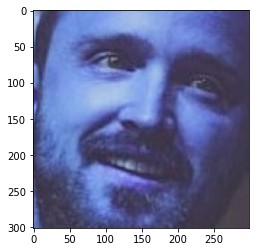

In [ ]:
#Image for above data
plt.imshow(cv2.imread("/content/drive/MyDrive/AIML/LABS/CV/Project2/Part2/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg"))
plt.show()

Few other images from dataset

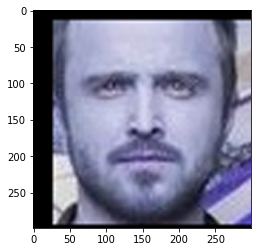

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/AIML/LABS/CV/Project2/Part2/pins/PINS/pins_Aaron Paul/Aaron Paul130_215.jpg"))
plt.show()

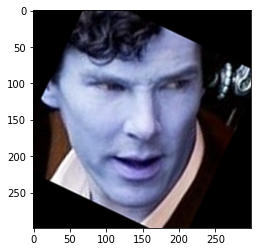

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/AIML/LABS/CV/Project2/Part2/PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch0.jpg"))
plt.show()

**VGG Face Model**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [ ]:
!pwd

/content/drive/MyDrive/AIML/LABS/CV/Project2/Part2


In [ ]:
!ls

'Part 3 - Aligned Face Dataset from Pinterest.zip'   pins
'Part 3 - vgg_face_weights.h5'			     PINS


In [8]:
model = vgg_face()

model.load_weights('./Part 3 - vgg_face_weights.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [9]:
#VGG Face Descrriptor
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [10]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [11]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [ ]:
embedding_vector[0:5]

array([ 0.03170306, -0.01505131, -0.01243403,  0.01952114, -0.00044387],
      dtype=float32)

In [ ]:
metadata.shape

(10770,)

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

In [ ]:
!ls

 embeddings.npy
'Part 2- Test Image - Benedict Cumberbatch9.jpg'
'Part 2 - Test Image - Dwayne Johnson4.jpg'
'Part 3 - Aligned Face Dataset from Pinterest.zip'
'Part 3 - vgg_face_weights.h5'
 pins
 PINS


In [ ]:
# Save data to file 
np.save("./embeddings.npy", embeddings)

In [13]:
embeddings = np.load('./embeddings.npy')

In [14]:
embeddings.shape

(10770, 2622)

In [15]:
#function to calucualte distance between two embeddings 
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

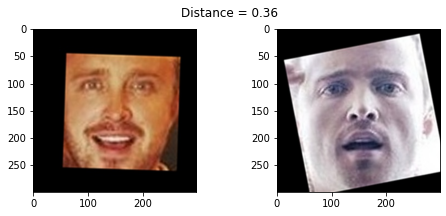

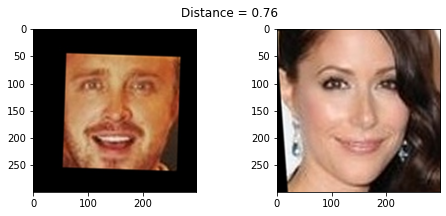

In [ ]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

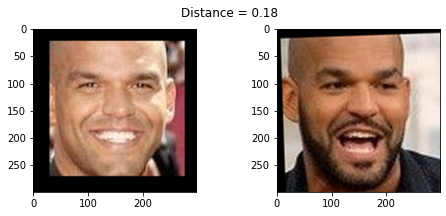

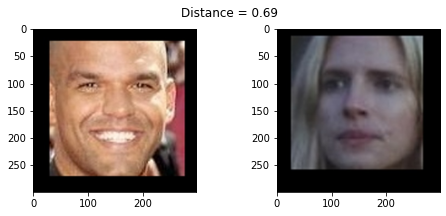

In [ ]:
show_pair(400, 401)
show_pair(400, 800)

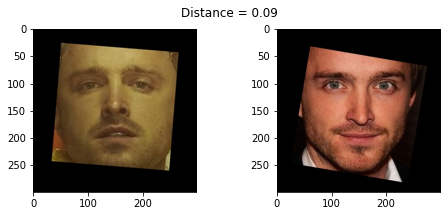

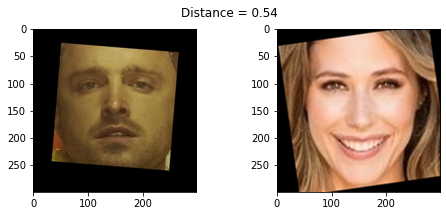

In [ ]:
show_pair(70, 71)
show_pair(70, 290)

In [16]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

In [22]:
print(train_idx[0:10])
print(test_idx[0:10])

[False  True  True  True  True  True  True  True  True False]
[ True False False False False False False False False  True]


In [23]:
#Checking shapes after train-test split
print("X_train shape is", X_train.shape) 
print("y_train shape is", y_train.shape) 
print("X_test shape is", X_test.shape) 
print("y_test shape is", y_test.shape)

X_train shape is (9573, 2622)
y_train shape is (9573,)
X_test shape is (1197, 2622)
y_test shape is (1197,)


In [ ]:
y_train[0:5]

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul', 'pins_Aaron Paul'], dtype='<U29')

In [24]:
#Encode labels

le = LabelEncoder()
encodedTrainLabels = le.fit_transform(y_train)
encodedTestLabels = le.fit_transform(y_test)

print(le.classes_)
print("\n")
print(list(set(encodedTrainLabels)))

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std =  scaler.fit_transform(X_test)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [27]:
from sklearn.svm import SVC

SVC = SVC(kernel='linear', class_weight='balanced',gamma='auto',probability=True)
SVC.fit(X_train_pca, encodedTrainLabels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
## Accuracy
acc_svc = round(SVC.score(X_test_pca, encodedTestLabels), 4)
print("Accuracy of Test set is : %0.4f" % (acc_svc))

Accuracy of Test set is : 0.9616


In [ ]:
#SVC Grid Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          'kernel': ['linear','rbf', 'poly']
          }
svc_grid = GridSearchCV(SVC, param_grid)
svc_grid = svc_grid.fit(X_train_pca, encodedTrainLabels)
print("Best estimator found by grid search:")
print(svc_grid.best_estimator_)

In [ ]:
## Accuracy
acc_svc_grid = round(svc_grid.score(X_test_pca, encodedTestLabels), 4)
print("Accuracy of Test set is : %0.4f" % (acc_svc_grid))

In [ ]:
## Predict y given validation set
predictions = SVC.predict(X_test_pca)

In [ ]:
predictions[100]

9

In [ ]:
le.classes_[9]

'pins_Bryan Cranston'

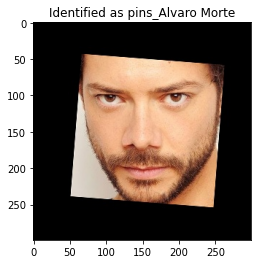

In [ ]:
# predict for images
example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = predictions[example_idx]
example_identity = le.classes_[example_prediction]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

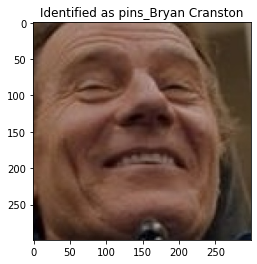

In [ ]:
# predict for images
example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = predictions[example_idx]
example_identity = le.classes_[example_prediction]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

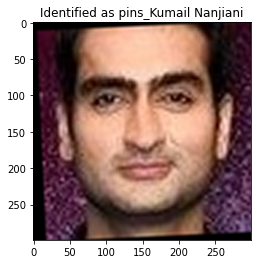

In [ ]:
# predict for images
example_idx = 400

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = predictions[example_idx]
example_identity = le.classes_[example_prediction]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

**Predict for given test images**

In [ ]:
!ls

 embeddings.npy
'Part 2- Test Image - Benedict Cumberbatch9.jpg'
'Part 2 - Test Image - Dwayne Johnson4.jpg'
'Part 3 - Aligned Face Dataset from Pinterest.zip'
'Part 3 - vgg_face_weights.h5'
 pins
 PINS


In [31]:
def classify(img_path,model):
    
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))

    print("image shape",img.shape)

    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    print(embedding_vector.shape)
    
    #Expand dimension of the vector
    embedding_vector = np.expand_dims(embedding_vector, axis=0)
    print(embedding_vector.shape)
    img_std = scaler.transform(embedding_vector)
    print("img shape after transform",img_std.shape)
    
    img_pca = pca.transform(img_std)
    print("img shape after PCA",img_pca.shape)
    pred = model.predict(img_pca)
    print(" ")
    
    plt.imshow(cv2.imread(img_path))
    plt.title(f'Identified as {le.classes_[pred]}');

image shape (224, 224, 3)
(2622,)
(1, 2622)
img shape after transform (1, 2622)
img shape after PCA (1, 128)
 


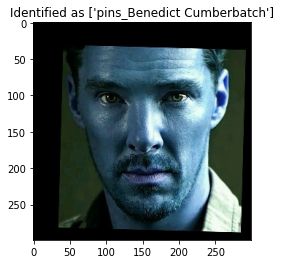

In [32]:
classify('./Part 2- Test Image - Benedict Cumberbatch9.jpg',SVC)

image shape (224, 224, 3)
(2622,)
(1, 2622)
img shape after transform (1, 2622)
img shape after PCA (1, 128)
 


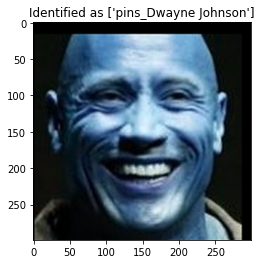

In [33]:
classify('./Part 2 - Test Image - Dwayne Johnson4.jpg',SVC)